# Creation de la base finale pour JS 

Votes et abstention

In [1]:
import pandas as pd
import geopandas as gpd
import os 
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
dir=os.getcwd()

Densite de population

In [2]:
dens=pd.read_csv(dir+'\\brut\\metropole-densites-de-population-par-commune.csv',sep=';')
dens=dens.rename(columns={'Code INSEE':'insee',"Densité d'habitants (hab/km2)" : 'densitehabkm2'})
dens=dens[['insee','densitehabkm2']]

TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'str'

In [68]:
dens.insee=dens.insee.astype(int)
dens.dtypes

insee              int32
densitehabkm2    float64
dtype: object

In [69]:
A=dens.sort_values('insee').sort_values('insee')

In [70]:
list(A.insee)

[77001,
 77002,
 77003,
 77004,
 77005,
 77006,
 77007,
 77008,
 77009,
 77010,
 77011,
 77012,
 77013,
 77014,
 77015,
 77016,
 77018,
 77019,
 77020,
 77021,
 77022,
 77023,
 77024,
 77025,
 77026,
 77027,
 77028,
 77029,
 77030,
 77031,
 77032,
 77033,
 77034,
 77035,
 77036,
 77037,
 77038,
 77039,
 77040,
 77041,
 77042,
 77043,
 77044,
 77045,
 77046,
 77047,
 77048,
 77049,
 77050,
 77051,
 77052,
 77053,
 77054,
 77055,
 77056,
 77057,
 77058,
 77059,
 77060,
 77061,
 77062,
 77063,
 77065,
 77066,
 77067,
 77068,
 77069,
 77070,
 77071,
 77072,
 77073,
 77075,
 77076,
 77077,
 77078,
 77079,
 77080,
 77081,
 77082,
 77083,
 77084,
 77085,
 77086,
 77087,
 77088,
 77089,
 77090,
 77091,
 77093,
 77094,
 77095,
 77096,
 77097,
 77098,
 77099,
 77100,
 77101,
 77102,
 77103,
 77104,
 77106,
 77107,
 77108,
 77109,
 77110,
 77111,
 77112,
 77113,
 77114,
 77115,
 77116,
 77117,
 77118,
 77119,
 77120,
 77121,
 77122,
 77123,
 77124,
 77125,
 77126,
 77127,
 77128,
 77129,
 77130,


Niveau de vie et taux de pauvreté

In [71]:
com=pd.read_csv(dir+'\\brut\\base-comparateur-de-territoires.csv',sep=';')
com=com.rename(columns={'CODGEO':'insee','MED16':'medianendv','TP6016':'tp'})
com=com[['insee','tp','medianendv']]

In [72]:
com.insee=com.insee.astype(int)
com.dtypes

insee           int32
tp            float64
medianendv    float64
dtype: object

In [73]:
com.head() # tp on a pas pour tout 

,insee,tp,medianendv
0,77006,NaN,26092.333333
1,77014,14.0,22116.500000
2,77018,8.0,24604.000000
3,77024,NaN,22022.222222
4,77038,NaN,29417.500000


In [74]:
len(com.insee.unique())

1287

Pollution

In [75]:
pol=pd.read_csv(dir+'\\brut\\indices_QA_commune_IDF_2017.csv',sep=',')

pol=pol.groupby('ninsee',as_index=False).mean()

pol=pol.rename(columns={'ninsee':'insee'})

In [76]:
pol.insee=pol.insee.astype(int)

In [77]:
pol.dtypes

insee      int32
no2      float64
o3       float64
pm10     float64
dtype: object

Diplomes 

In [78]:
dipl = pd.read_csv(dir+'\\brut\\base-cc-diplomes-formation-2016.csv',sep=';')

C:\Users\morga\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
dipl=dipl[['CODGEO','P16_NSCOL15P','P16_NSCOL15P_SUP']]

dipl=dipl.rename(columns={'P16_NSCOL15P':'nb_nscol','P16_NSCOL15P_SUP':'dipl_sup','CODGEO':'insee'})

dipl=dipl.assign(dipl_su_tx=dipl.dipl_sup/dipl.nb_nscol)

dipl=dipl[['insee','dipl_su_tx']]


In [80]:
dipl.dtypes

insee          object
dipl_su_tx    float64
dtype: object

In [81]:
import numpy as np

In [82]:
dipl=dipl[pd.to_numeric(dipl['insee'], errors='coerce').notnull()]

In [83]:
dipl.insee=dipl.insee.astype(int)

Prix au mètre carré 

In [84]:
prix=pd.read_csv(dir+'\\brut\\prixm2-communes-2017.csv',sep=',')

prix=prix[['INSEE_COM','Prixm2']]

prix=prix.rename(columns={'INSEE_COM':'insee','Prixm2':'prixm2'})

In [85]:
prix.dtypes

insee      object
prixm2    float64
dtype: object

In [86]:
prix=prix[pd.to_numeric(prix['insee'], errors='coerce').notnull()]
prix.insee=prix.insee.astype(int)

In [87]:
prix.dtypes

insee       int32
prixm2    float64
dtype: object

Impôt sur la fortune

In [88]:
isf=pd.read_excel(dir+'\\brut\\ificom2018.xlsx',headers=True,sheet_name='définitif impot')

isf=isf[['Code commune (INSEE)','nombre de redevables','patrimoine moyen en €','impôt moyen en €']]

isf.columns=['insee','nb_redevables','patrimoineeuro','impotmoyeneuro']

In [89]:
isf.dtypes

insee              object
nb_redevables       int64
patrimoineeuro    float64
impotmoyeneuro    float64
dtype: object

In [90]:
isf['insee']= isf['insee'].transform(lambda x : x.replace(' ','')) 

In [91]:
isf=isf[pd.to_numeric(isf['insee'], errors='coerce').notnull()]
isf.insee=isf.insee.astype(int)

In [92]:
isf.dtypes

insee               int32
nb_redevables       int64
patrimoineeuro    float64
impotmoyeneuro    float64
dtype: object

In [93]:
#Base Sarah 
eco=pd.read_csv(dir+'\\brut\\data_chom_prop.csv')
eco.head()

,Unnamed: 0,insee,TauxProprietaires,TauxChomage,NiveauVieMedian
0,29274,75056,33.097629,12.070128,26808.0
1,29983,77001,89.804772,7.377049,28596.0
2,29984,77002,82.445141,8.505155,22877.0
3,29985,77003,83.448276,5.238095,25606.0
4,29986,77004,90.082645,4.794521,26871.0


In [94]:
eco=eco.drop(columns=['Unnamed: 0'])
eco=eco.rename(columns={'CODGEO':'insee'})

In [95]:
eco.dtypes

insee                  int64
TauxProprietaires    float64
TauxChomage          float64
NiveauVieMedian      float64
dtype: object

Votes

In [96]:
#vote =pd.read_csv(dir+'\\brut\\data_final_vote.csv')
#vote=vote[['CODGEO','Tour1Candidat1']]

In [97]:
#vote=vote.rename(columns={'CODGEO':'insee'})

In [98]:
# Vote à la mano 
vote = pd.read_excel(dir+'\\brut\\vote_mano.xlsx')

Merge 

In [99]:
bases=[eco,dens,dipl,pol,vote,com,isf,prix]

In [100]:
import geopandas as gpd 
pop=gpd.read_file(r'C:\Users\morga\Documents\GitHub\MLPython\dataviz\Graphique_bokeh\pop_comgeo.geojson')
variables= pd.DataFrame(pop.insee)
variables.insee=variables.insee.astype(int)

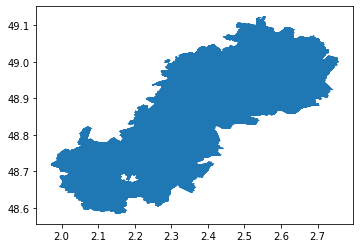

In [101]:
pop.plot()

In [102]:
pop.sort_values('insee')

,insee,year,population,pct_ch,year_rer,year_pop,steps,geometry
847,75101,1968,32332.0,0.884766,1968,1968,2,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
854,75101,2017,16266.0,0.951228,2017,2017,9,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
853,75101,2012,17100.0,0.963652,2012,2012,8,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
852,75101,2006,17745.0,1.050311,2006,2006,7,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
851,75101,1999,16895.0,0.920207,1999,1999,6,"POLYGON ((2.32801 48.86992, 2.32997 48.86851, ..."
...,...,...,...,...,...,...,...,...
1854,95680,1962,12797.0,3.040390,1962,1962,1,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ..."
1862,95680,2017,27676.0,1.006546,2017,2017,9,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ..."
1861,95680,2012,27496.0,1.013491,2012,2012,8,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ..."
1859,95680,1999,26143.0,1.001264,1999,1999,6,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ..."


In [103]:
for data in bases:
    variables=variables.merge(data,how='left',on='insee')

In [104]:
variables.head()

,insee,TauxProprietaires,TauxChomage,NiveauVieMedian,densitehabkm2,dipl_su_tx,no2,o3,pm10,Tour1Candidat1,tp,medianendv,nb_redevables,patrimoineeuro,impotmoyeneuro,prixm2
0,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
1,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
2,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
3,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
4,78561,77.108434,3.913043,36311.0,66.261398,0.56636,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0


In [105]:
variables

,insee,TauxProprietaires,TauxChomage,NiveauVieMedian,densitehabkm2,dipl_su_tx,no2,o3,pm10,Tour1Candidat1,tp,medianendv,nb_redevables,patrimoineeuro,impotmoyeneuro,prixm2
0,78561,77.108434,3.913043,36311.0,66.261398,0.566360,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
1,78561,77.108434,3.913043,36311.0,66.261398,0.566360,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
2,78561,77.108434,3.913043,36311.0,66.261398,0.566360,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
3,78561,77.108434,3.913043,36311.0,66.261398,0.566360,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
4,78561,77.108434,3.913043,36311.0,66.261398,0.566360,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,77525,80.740741,11.574074,25123.0,67.107750,0.179389,20.203297,31.640110,30.123626,LE PEN Marine,NaN,25123.333333,NaN,NaN,NaN,1149.0
2120,77525,80.740741,11.574074,25123.0,67.107750,0.179389,20.203297,31.640110,30.123626,LE PEN Marine,NaN,25123.333333,NaN,NaN,NaN,1149.0
2121,77525,80.740741,11.574074,25123.0,67.107750,0.179389,20.203297,31.640110,30.123626,LE PEN Marine,NaN,25123.333333,NaN,NaN,NaN,1149.0
2122,77525,80.740741,11.574074,25123.0,67.107750,0.179389,20.203297,31.640110,30.123626,LE PEN Marine,NaN,25123.333333,NaN,NaN,NaN,1149.0


In [106]:
# Soucis avec les élections j'ai pas les correspondances !! 

In [107]:
variables.drop_duplicates( inplace = True) 

In [108]:
variables.to_csv('variables.csv')

In [ ]:
# sarah : arrondir avec 2 chiffres significatifs le dataset variables
# j'ai eu un soucis pour exécuter le code précédent donc j'ai juste réimporter le csv "variables.csv" pour le réexporter
# avec les valeurs arrondies

In [20]:
variables_rounded = pd.read_csv("variables.csv")

In [21]:
variables_rounded.head()

,Unnamed: 0,insee,TauxProprietaires,TauxChomage,NiveauVieMedian,densitehabkm2,dipl_su_tx,no2,o3,pm10,Tour1Candidat1,tp,medianendv,nb_redevables,patrimoineeuro,impotmoyeneuro,prixm2
0,0,78561,77.108434,3.913043,36311.0,66.261398,0.566360,16.343407,32.082418,24.543956,FILLON FranÃ§ois,NaN,36311.470588,NaN,NaN,NaN,2113.0
1,9,91338,70.493601,6.921676,28123.0,459.758694,0.407091,15.585165,33.145604,24.571429,MACRON Emmanuel,5.0,28122.777778,NaN,NaN,NaN,2881.0
2,18,91122,71.183717,8.049015,31769.0,2145.454545,0.639110,19.354396,32.717033,25.989011,MACRON Emmanuel,5.0,31768.888889,NaN,NaN,NaN,3848.0
3,27,78343,78.388278,6.285714,37659.0,620.883534,0.634846,21.620879,30.879121,26.065934,FILLON FranÃ§ois,NaN,37659.333333,NaN,NaN,NaN,4044.0
4,36,91679,74.400000,7.317073,31538.0,201.803279,0.540758,19.321429,31.868132,25.612637,MACRON Emmanuel,NaN,31538.400000,NaN,NaN,NaN,3673.0


In [22]:
# drop 1st column
variables_rounded.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
#round to 2 decimal numbers
variables_rounded = variables_rounded.round(2)
variables_rounded.head()

,insee,TauxProprietaires,TauxChomage,NiveauVieMedian,densitehabkm2,dipl_su_tx,no2,o3,pm10,Tour1Candidat1,tp,medianendv,nb_redevables,patrimoineeuro,impotmoyeneuro,prixm2
0,78561,77.11,3.91,36311.0,66.26,0.57,16.34,32.08,24.54,FILLON FranÃ§ois,NaN,36311.47,NaN,NaN,NaN,2113.0
1,91338,70.49,6.92,28123.0,459.76,0.41,15.59,33.15,24.57,MACRON Emmanuel,5.0,28122.78,NaN,NaN,NaN,2881.0
2,91122,71.18,8.05,31769.0,2145.45,0.64,19.35,32.72,25.99,MACRON Emmanuel,5.0,31768.89,NaN,NaN,NaN,3848.0
3,78343,78.39,6.29,37659.0,620.88,0.63,21.62,30.88,26.07,FILLON FranÃ§ois,NaN,37659.33,NaN,NaN,NaN,4044.0
4,91679,74.40,7.32,31538.0,201.80,0.54,19.32,31.87,25.61,MACRON Emmanuel,NaN,31538.40,NaN,NaN,NaN,3673.0


In [24]:
variables_rounded.to_csv('variables_rounded.csv')

Professionnels de Santé

In [109]:
med=pd.read_csv(dir+'\\brut\\annuaire-et-localisation-des-professionnels-de-sante.csv',sep=';')

med=med[["Nature de l'exercice","Convention du professionnel","Coordonnées",'Adresse','Code INSEE']]

med.columns=['nature_exercice','convention','coordonnees','adresse','insee']

In [110]:
# Ici interessant de mettre des marqueurs ? Je laisse comme ça => sinon compter 
med.groupby('insee').count()

,nature_exercice,convention,coordonnees,adresse
insee,,,,
75056,8263,8263,8263,8263
77005,3,3,3,3
77014,22,22,22,22
77016,1,1,1,1
77018,15,15,15,15
...,...,...,...,...
95637,19,19,19,19
95651,5,5,5,5
95652,6,6,6,6


In [111]:
med.dtypes

nature_exercice    object
convention         object
coordonnees        object
adresse            object
insee               int64
dtype: object

In [112]:
med.insee=med.insee.astype(int)

# Traffic (lié aux stations et non aux communes)

In [113]:
traffic=pd.read_csv(r'C:/Users/morga/Downloads/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-2e-sem.csv',sep=';')

traffic=traffic[traffic['CODE_STIF_TRNS']==810]

CHAT = traffic[traffic['LIBELLE_ARRET'].str.startswith('CHAT')]

traffic=traffic[traffic['CODE_STIF_RES']==802]

traffic=traffic.append(CHAT)

traffic=traffic.groupby(['JOUR','LIBELLE_ARRET'],as_index=False)['NB_VALD'].sum()

traffic=traffic[['LIBELLE_ARRET','NB_VALD']]

traffic=traffic.groupby(['LIBELLE_ARRET'],as_index=False).mean()

FileNotFoundError: [Errno 2] File C:/Users/morga/Downloads/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-2e-sem.csv does not exist: 'C:/Users/morga/Downloads/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-2e-sem.csv'

In [ ]:
perc_traffic=pd.read_csv(dir+'\\brut\\validations-sur-le-reseau-ferre-profils-horaires-par-jour-type-2e-sem.csv')

perc_traffic=perc_traffic[perc_traffic['CODE_STIF_TRNS']==810]

perc_traffic=perc_traffic[['LIBELLE_ARRET','TRNC_HORR_60','pourc_validations']]

In [114]:
perc_traffic.head()

NameError: name 'perc_traffic' is not defined

In [115]:
traffic.head()

NameError: name 'traffic' is not defined

In [116]:
traffic_par_heure=perc_traffic.merge(traffic,how='left')

NameError: name 'perc_traffic' is not defined

In [117]:
traffic_par_heure=traffic_par_heure.assign(NB_VALD_HOUR=traffic_par_heure.pourc_validations*traffic_par_heure.NB_VALD)

NameError: name 'traffic_par_heure' is not defined

In [ ]:
traffic_par_heure.to_csv('traffic_par_heure.csv')

Cartes pour visualiser le résultat 

In [118]:
import geopandas as gpd 
pop=gpd.read_file(r'C:\Users\morga\Documents\GitHub\MLPython\dataviz\Graphique_bokeh\pop_comgeo.geojson')
pop.insee=pop.insee.astype(int)
data_map=variables.merge(pop,on='insee')

In [119]:
data_map.columns

Index(['insee', 'TauxProprietaires', 'TauxChomage', 'NiveauVieMedian',
       'densitehabkm2', 'dipl_su_tx', 'no2', 'o3', 'pm10', 'Tour1Candidat1',
       'tp', 'medianendv', 'nb_redevables', 'patrimoineeuro', 'impotmoyeneuro',
       'prixm2', 'year', 'population', 'pct_ch', 'year_rer', 'year_pop',
       'steps', 'geometry'],
      dtype='object')

In [120]:
import mapclassify
import geoplot
import matplotlib.pyplot as plt 
data_map=data_map.set_geometry('geometry')

Text(0.5, 1.0, 'Taux de chômage')

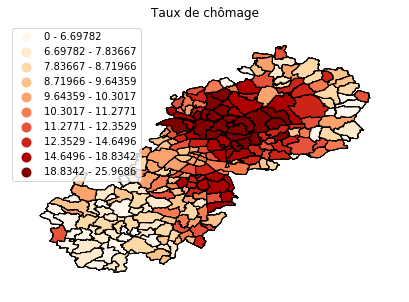

In [121]:
scheme = mapclassify.Quantiles(data_map.TauxChomage, k=10)
geoplot.choropleth(
    data_map, hue=data_map.TauxChomage, scheme=scheme,
    cmap='OrRd', figsize=(10, 5),legend=True
)
plt.title('Taux de chômage')

Text(0.5, 1.0, 'Taux de propriétaires')

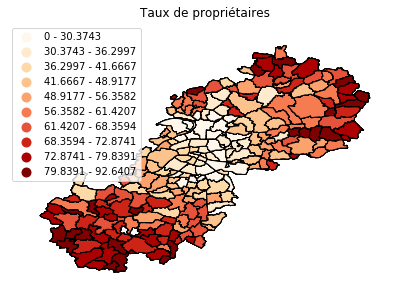

In [122]:
scheme = mapclassify.Quantiles(data_map.TauxProprietaires, k=10)
geoplot.choropleth(
    data_map, hue=data_map.TauxProprietaires, scheme=scheme,
    cmap='OrRd', figsize=(10, 5),legend=True
)
plt.title('Taux de propriétaires')

Text(0.5, 1.0, 'Taux pollution pm10')

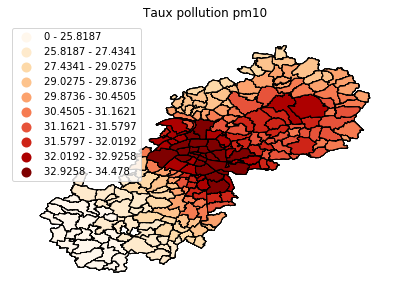

In [123]:
scheme = mapclassify.Quantiles(data_map.pm10, k=10)
geoplot.choropleth(
    data_map, hue=data_map.pm10, scheme=scheme,
    cmap='OrRd', figsize=(10, 5),legend=True
)
plt.title('Taux pollution pm10')

Text(0.5, 1.0, 'dipl_su_tx')

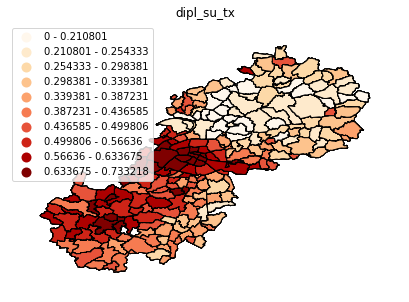

In [124]:
scheme = mapclassify.Quantiles(data_map.dipl_su_tx, k=10)
geoplot.choropleth(
    data_map, hue=data_map.dipl_su_tx, scheme=scheme,
    cmap='OrRd', figsize=(10, 5),legend=True
)
plt.title('dipl_su_tx')

Text(0.5, 1.0, 'vote_politique')

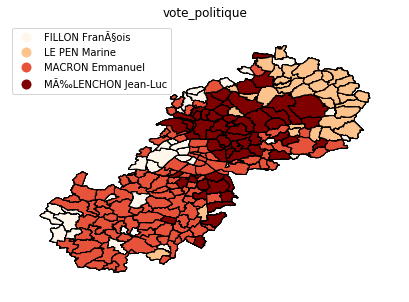

In [126]:

geoplot.choropleth(
    data_map, hue=data_map.Tour1Candidat1,
    cmap='OrRd', figsize=(10, 5),legend=True
)
plt.title('vote_politique')